In [30]:
import pandas as pd
import numpy as np

In [31]:
fn = 'repair_process_log.csv'
events = pd.read_csv(fn,sep=';')
events['Time'] = pd.to_datetime(events['Time'],format='%d.%m.%Y %H:%M')
events

,Case,Activity,Resource,Time
0,1,A_receive_item,John,1990-01-01
1,1,B_check_item,Mike,1990-02-01
2,1,C_check_warranty,John,1990-03-01
3,1,D_notify_customer,Sue,1990-04-01
4,1,E_repair_item,Pete,1990-05-01
5,1,F_issue_payment,Jane,1990-06-01
6,1,H_return_item,Sue,1990-07-01
7,2,A_receive_item,John,1990-01-01
8,2,B_check_item,Fred,1990-02-01
9,2,C_check_warranty,John,1990-03-01


In [32]:
# Resource Activity Matrix
resource_activity_matrix = events.groupby("Activity")["Resource"].value_counts().unstack().fillna(0).transpose()
print(resource_activity_matrix)

Activity  A_receive_item  B_check_item  C_check_warranty  D_notify_customer  \
Resource                                                                      
Clare                0.0           0.0               0.0                3.0   
Fred                 0.0           2.0               0.0                0.0   
Jane                 0.0           0.0               0.0                0.0   
John                 6.0           0.0               6.0                0.0   
Mike                 0.0           2.0               0.0                0.0   
Mona                 0.0           0.0               0.0                0.0   
Pete                 0.0           1.0               0.0                0.0   
Robert               0.0           1.0               0.0                0.0   
Sue                  0.0           0.0               0.0                3.0   

Activity  E_repair_item  F_issue_payment  G_cancellation  H_return_item  
Resource                                                

In [33]:
# normalize resource activity matrix by the number of cases
num_cases = len(events['Case'].unique())
resource_activity_matrix_norm = resource_activity_matrix.div(num_cases)
resource_activity_matrix_norm

Activity,A_receive_item,B_check_item,C_check_warranty,D_notify_customer,E_repair_item,F_issue_payment,G_cancellation,H_return_item
Resource,,,,,,,,
Clare,0.0,0.000000,0.0,0.5,0.000000,0.000000,0.166667,0.5
Fred,0.0,0.333333,0.0,0.0,0.166667,0.000000,0.000000,0.0
Jane,0.0,0.000000,0.0,0.0,0.000000,0.333333,0.000000,0.0
John,1.0,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.0
Mike,0.0,0.333333,0.0,0.0,0.166667,0.000000,0.000000,0.0
Mona,0.0,0.000000,0.0,0.0,0.000000,0.333333,0.000000,0.0
Pete,0.0,0.166667,0.0,0.0,0.166667,0.000000,0.000000,0.0
Robert,0.0,0.166667,0.0,0.0,0.166667,0.000000,0.000000,0.0
Sue,0.0,0.000000,0.0,0.5,0.000000,0.000000,0.166667,0.5


In [34]:
# calculate manhattan distances between resources
from scipy.spatial.distance import pdist, squareform
distances = pdist(resource_activity_matrix_norm, metric='cityblock')
distances = squareform(distances)
distances = pd.DataFrame(distances, index=resource_activity_matrix_norm.index, columns=resource_activity_matrix_norm.index)
distances

Resource,Clare,Fred,Jane,John,Mike,Mona,Pete,Robert,Sue
Resource,,,,,,,,,
Clare,0.000000,1.666667,1.500000,3.166667,1.666667,1.500000,1.500000,1.500000,0.000000
Fred,1.666667,0.000000,0.833333,2.500000,0.000000,0.833333,0.166667,0.166667,1.666667
Jane,1.500000,0.833333,0.000000,2.333333,0.833333,0.000000,0.666667,0.666667,1.500000
John,3.166667,2.500000,2.333333,0.000000,2.500000,2.333333,2.333333,2.333333,3.166667
Mike,1.666667,0.000000,0.833333,2.500000,0.000000,0.833333,0.166667,0.166667,1.666667
Mona,1.500000,0.833333,0.000000,2.333333,0.833333,0.000000,0.666667,0.666667,1.500000
Pete,1.500000,0.166667,0.666667,2.333333,0.166667,0.666667,0.000000,0.000000,1.500000
Robert,1.500000,0.166667,0.666667,2.333333,0.166667,0.666667,0.000000,0.000000,1.500000
Sue,0.000000,1.666667,1.500000,3.166667,1.666667,1.500000,1.500000,1.500000,0.000000


In [35]:
# invert distances to get similarity ignoring diagonal
similarity_manhattan = 1/distances
similarity_manhattan = similarity_manhattan - np.diag(np.diag(similarity_manhattan))
similarity_manhattan

Resource,Clare,Fred,Jane,John,Mike,Mona,Pete,Robert,Sue
Resource,,,,,,,,,
Clare,NaN,0.6,0.666667,0.315789,0.6,0.666667,0.666667,0.666667,inf
Fred,0.600000,NaN,1.200000,0.400000,inf,1.200000,6.000000,6.000000,0.600000
Jane,0.666667,1.2,NaN,0.428571,1.2,inf,1.500000,1.500000,0.666667
John,0.315789,0.4,0.428571,NaN,0.4,0.428571,0.428571,0.428571,0.315789
Mike,0.600000,inf,1.200000,0.400000,NaN,1.200000,6.000000,6.000000,0.600000
Mona,0.666667,1.2,inf,0.428571,1.2,NaN,1.500000,1.500000,0.666667
Pete,0.666667,6.0,1.500000,0.428571,6.0,1.500000,NaN,inf,0.666667
Robert,0.666667,6.0,1.500000,0.428571,6.0,1.500000,inf,NaN,0.666667
Sue,inf,0.6,0.666667,0.315789,0.6,0.666667,0.666667,0.666667,NaN


In [36]:
similarity_manhattan.replace(np.inf, 2, inplace=True)
similarity_manhattan.fillna(0, inplace=True)
similarity_manhattan[similarity_manhattan < 1] = 0
similarity_manhattan

Resource,Clare,Fred,Jane,John,Mike,Mona,Pete,Robert,Sue
Resource,,,,,,,,,
Clare,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
Fred,0.0,0.0,1.2,0.0,2.0,1.2,6.0,6.0,0.0
Jane,0.0,1.2,0.0,0.0,1.2,2.0,1.5,1.5,0.0
John,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mike,0.0,2.0,1.2,0.0,0.0,1.2,6.0,6.0,0.0
Mona,0.0,1.2,2.0,0.0,1.2,0.0,1.5,1.5,0.0
Pete,0.0,6.0,1.5,0.0,6.0,1.5,0.0,2.0,0.0
Robert,0.0,6.0,1.5,0.0,6.0,1.5,2.0,0.0,0.0
Sue,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


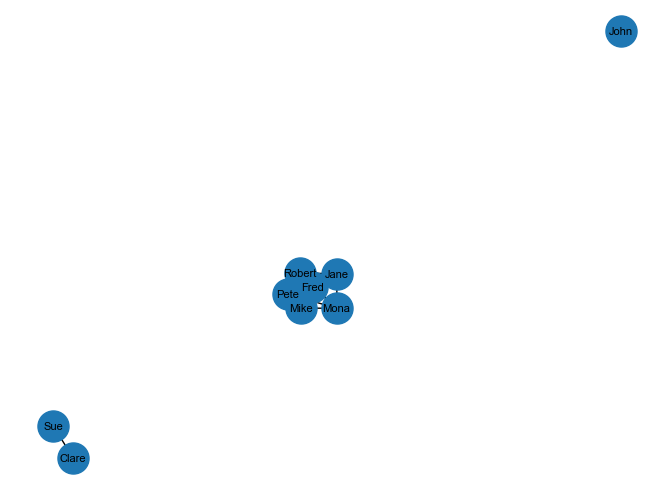

In [37]:
#!pip install --upgrade networkx # this needs to be run only once if error "module 'matplotlib.cbook' has no attribute 'iterable'" appears
import networkx as nx
# Fix: nx.from_numpy_matrix(similarity_manhattan.values) -> nx.from_numpy_array(similarity_manhattan.values)
G = nx.from_numpy_array(similarity_manhattan.values)
G = nx.relabel_nodes(G, dict(zip(range(len(similarity_manhattan.index)), similarity_manhattan.index)))
#nx.draw(G, with_labels=True, node_size=1000, node_color='lightblue', font_size=8, width=list(nx.get_edge_attributes(G,'weight').values()))
nx.draw(G, with_labels=True, node_size=500, font_size=8)

In [38]:
from sklearn.cluster import AgglomerativeClustering
# Fix: affinity='euclidean' -> metric='euclidean'
clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average').fit(resource_activity_matrix_norm)
print(list(zip(list(resource_activity_matrix_norm.index), clustering.labels_)))

[('Clare', np.int64(2)), ('Fred', np.int64(0)), ('Jane', np.int64(0)), ('John', np.int64(1)), ('Mike', np.int64(0)), ('Mona', np.int64(0)), ('Pete', np.int64(0)), ('Robert', np.int64(0)), ('Sue', np.int64(2))]
